In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [3]:
cars = pd.read_csv('./project_new.csv')
cars

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,isSPORT,isVVTLI,isCOMFORT,isLINEA,isLUNA,isWAGON,isLIFT,isHATCH,isSEDAN,isVERSO
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,0,0,0,0,0,0,0,1,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,0,0,0,0,0,0,1,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,0,0,0,0,0,1,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,0,0,0,0,0,1,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,0,0,0,0,0,0,0,1,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,0,0,0,0,0,0,0,1,0,0
6,7,?TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,0,0,0,0,0,0,0,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,0,0,0,0,0,0,0,0,0,0
8,9,?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,0,0,0,0,0,0,0,0,0
9,10,?TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,0,0,0,0,0,1,0,0


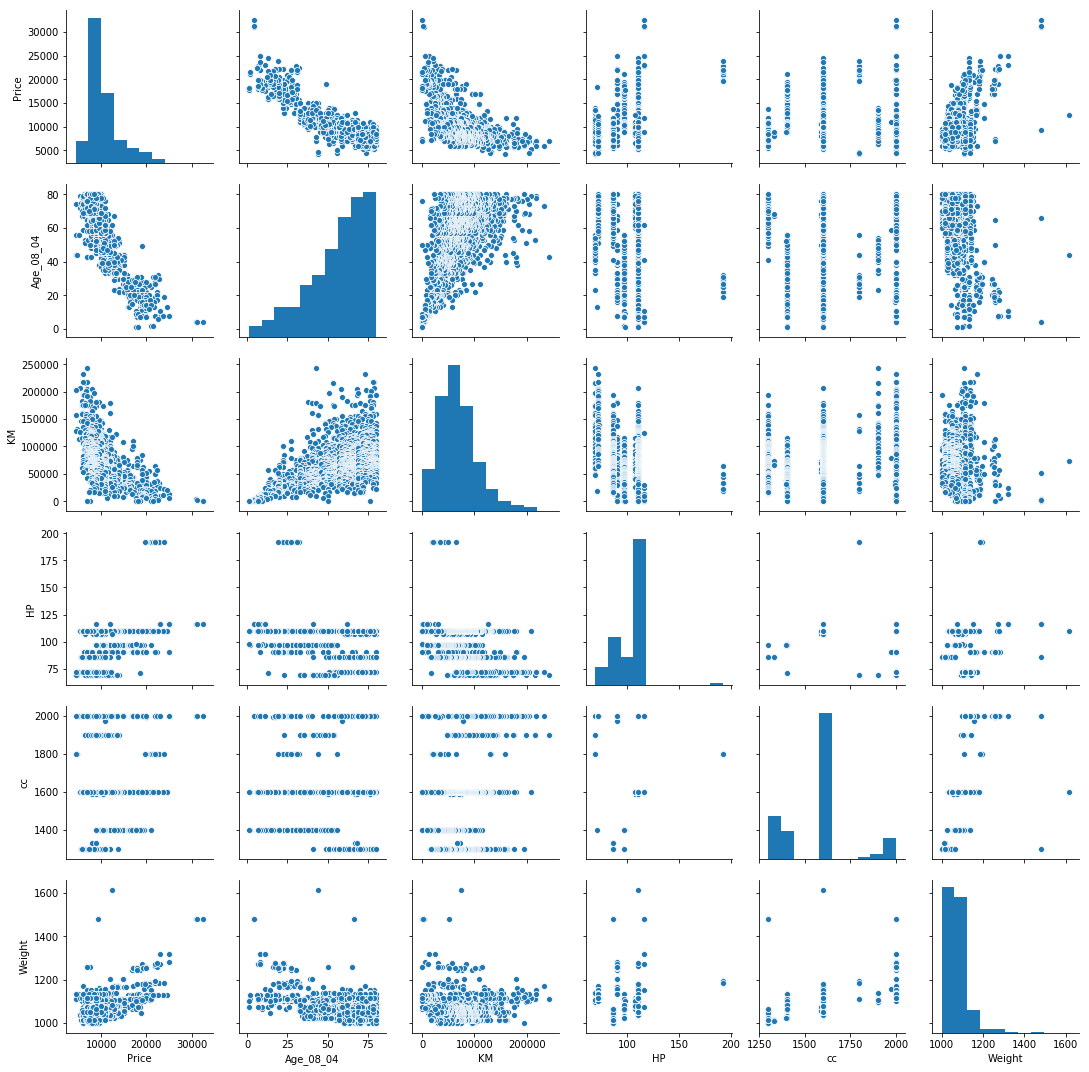

In [22]:
sns.pairplot(cars, vars = ['Price','Age_08_04', 'KM','HP','cc','Weight'])

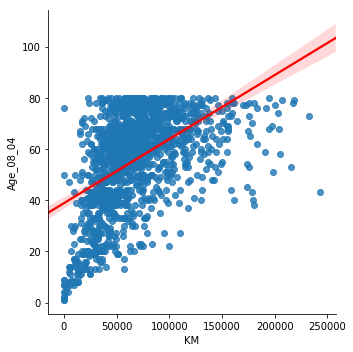

In [18]:
sns.lmplot(x='KM', y='Age_08_04', data=cars, line_kws={"color": "red"})

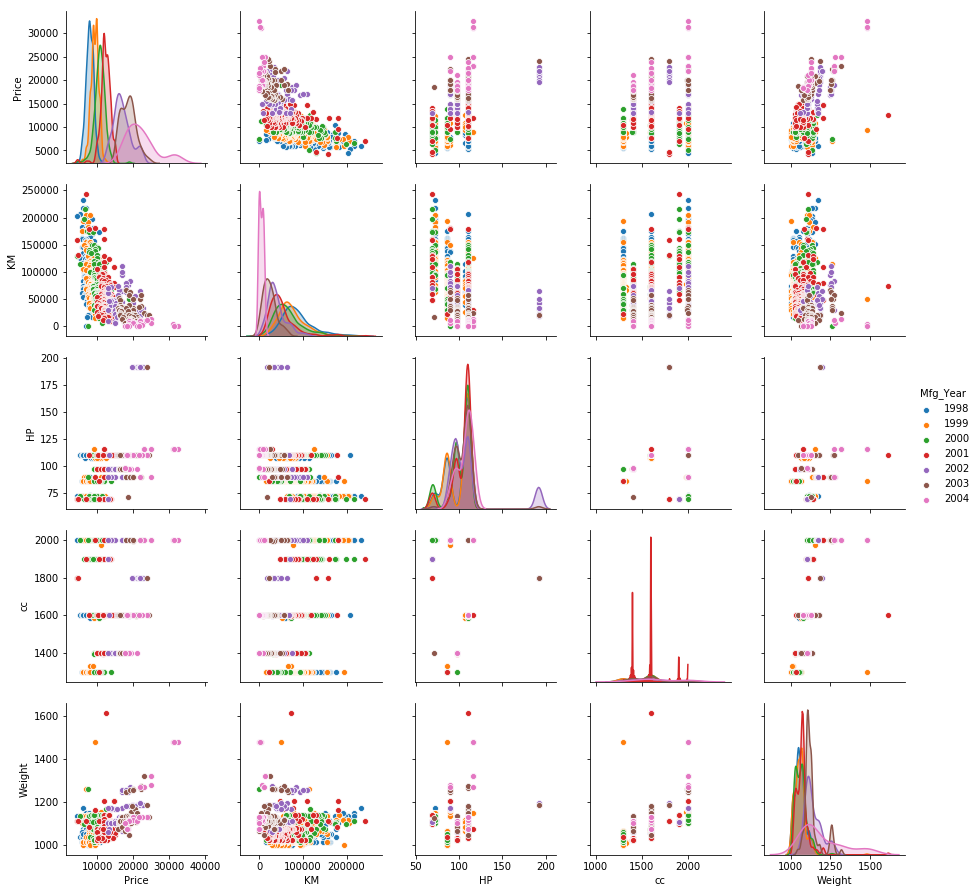

In [26]:
sns.pairplot(cars, vars = ['Price', 'KM','HP','cc','Weight'], hue = 'Mfg_Year')

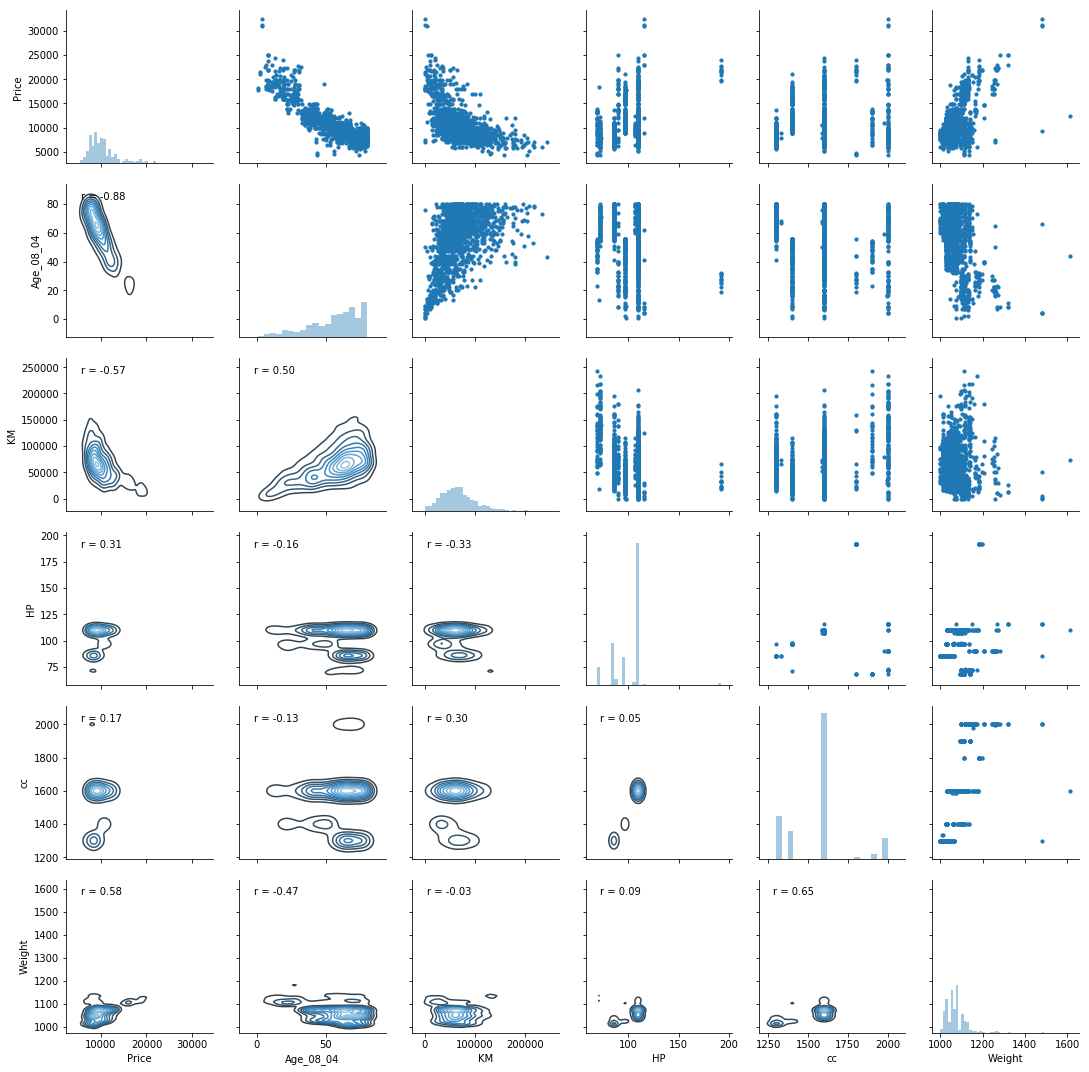

In [30]:
import matplotlib.pyplot as plt
from scipy import stats
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(cars, vars = ['Price','Age_08_04','KM','HP','cc','Weight'], palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)


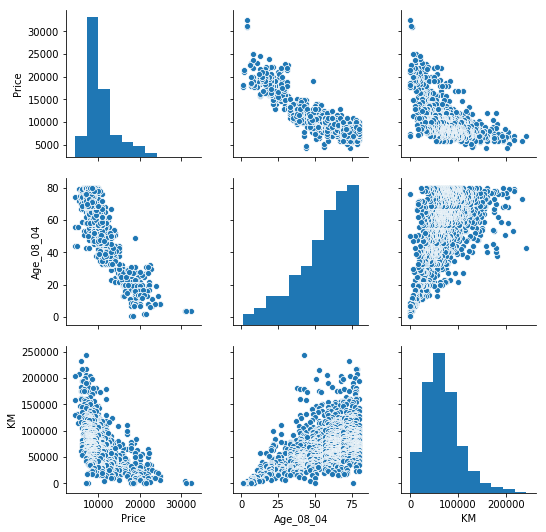

In [31]:
sns.pairplot(cars, vars = ['Price','Age_08_04', 'KM'])

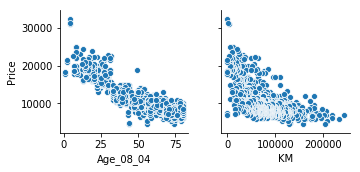

In [32]:
sns.pairplot(cars, x_vars=['Age_08_04','KM'], y_vars='Price')